            Date        Open        High         Low       Close
0     2018-02-05  262.000000  267.899994  250.029999  254.259995
1     2018-02-06  247.699997  266.700012  245.000000  265.720001
2     2018-02-07  266.579987  272.450012  264.329987  264.559998
3     2018-02-08  267.079987  267.619995  250.000000  250.100006
4     2018-02-09  253.850006  255.800003  236.110001  249.470001
...          ...         ...         ...         ...         ...
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013

[1009 rows x 5 columns]


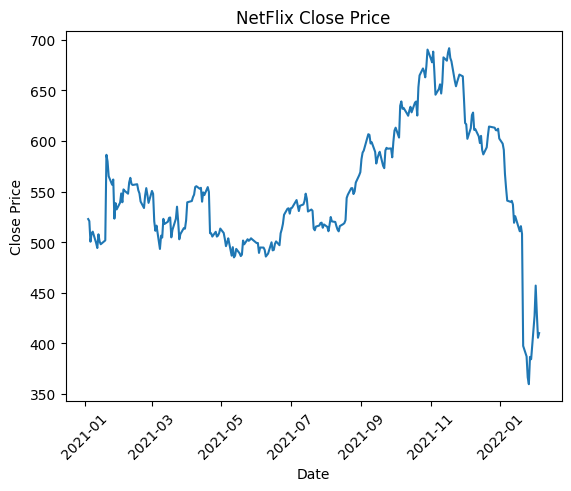

최고 종가 : 691.690002
최저 종가 : 359.700012


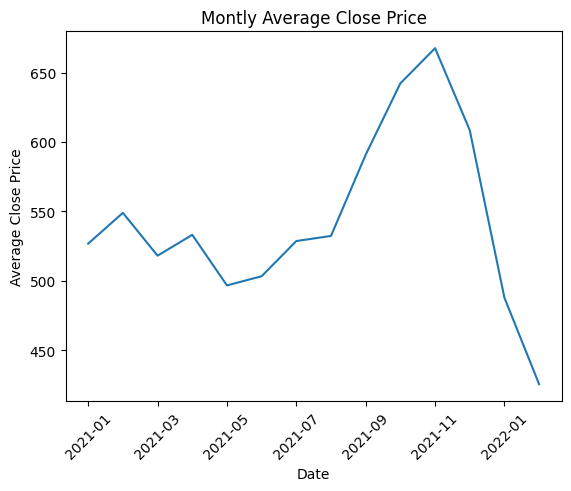

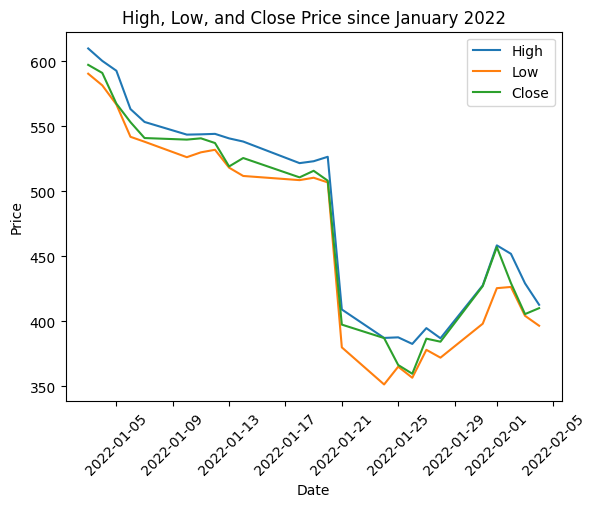

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os

# script_dir = os.path.dirname(os.path.abspath(__file__))
# os.chdir(script_dir)

# A. DATA 읽어오기
selected_col = ['Date', 'Open', 'High', 'Low', 'Close']
data = pd.read_csv('NFLX.csv', usecols=selected_col)
print(data)

# B. 2021년 이후 종가 데이터 시각화하기
data['Date'] = pd.to_datetime(data['Date'])
data_after_2021 = data[data['Date'].dt.year >= 2021]

plt.plot(data_after_2021['Date'], data_after_2021['Close'])
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Close Price')
plt.title('NetFlix Close Price')
plt.show()

# C. 2021년 이후 최고/최저 종가 출력하기
min_price = data_after_2021['Close'].min()
max_price = data_after_2021['Close'].max()

print(f'최고 종가 : {max_price}')
print(f'최저 종가 : {min_price}')

# D. 2021년 이후 월별 평균 종가 출력하기
month_mean_close = data_after_2021.groupby(data_after_2021['Date'].dt.to_period('M'))['Close'].mean()

plt.plot(month_mean_close.index.strftime('%Y-%m'), month_mean_close)

plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Average Close Price')
plt.title('Montly Average Close Price')
plt.xticks([0,2,4,6,8,10,12])
plt.show()

# E. 2022년 이후 최고, 최저, 종가 시각화하기
data_after_2022 = data[data['Date'].dt.year >= 2022]
plt.plot(data_after_2022['Date'], data_after_2022['High'], label = 'High')
plt.plot(data_after_2022['Date'], data_after_2022['Low'], label = 'Low')
plt.plot(data_after_2022['Date'], data_after_2022['Close'], label = 'Close')
plt.title('High, Low, and Close Price since January 2022')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Price')
plt.legend()
plt.show()



